# Basic Aircraft Geometry

In the [Design Optimization section of the tutorial](.../02 - Design Optimization), we gave an example of aircraft geometry. Here, we expand on that.

Aircraft geometry in AeroSandbox is represented using a nested data structure. Let's take a look.

First, standard imports:

In [7]:
import aerosandbox as asb
import aerosandbox.numpy as np

Now, let's build an airplane:

In [8]:
# Here, all distances are in meters and all angles are in degrees.
airplane = asb.Airplane(
    name="Example Airplane",
    xyz_ref=[0.5, 0, 0],  # Reference for moments
    s_ref=9,  # Reference area
    c_ref=0.9,  # Reference chord
    b_ref=10,  # Reference span
    wings=[
        asb.Wing(
            name="Wing",
            xyz_le=[0, 0, 0],  # Coordinates of the wing's leading edge
            symmetric=True,  # Should this wing be mirrored across the XZ plane?
            xsecs=[  # The wing's cross ("X") sections, or "XSecs"
                asb.WingXSec(  # Root
                    xyz_le=[0, 0, 0],  # Coordinates of the XSec's leading edge relative to the wing's leading edge
                    chord=1,
                    twist=1,  # in degrees
                    airfoil=asb.Airfoil("sd7032"),
                    control_surface_is_symmetric=False,  # Aileron
                    control_surface_deflection=0,  # in degrees
                    # (ctrl. surfs. are applied between this XSec and the next one.)
                ),
                asb.WingXSec(  # Tip
                    xyz_le=[0.2, 5, 1],
                    chord=0.6,
                    twist=-1,
                    airfoil=asb.Airfoil("sd7037"),
                )
            ]
        ),
        asb.Wing(
            name="H-stab",
            symmetric=True,
            xyz_le=[4, 0, 0],
            xsecs=[
                asb.WingXSec(
                    xyz_le=[0, 0, 0],
                    chord=0.7,
                    airfoil=asb.Airfoil("ht08")
                ),
                asb.WingXSec(
                    xyz_le=[0.14, 1.25, 0],
                    chord=0.42,
                    airfoil=asb.Airfoil("ht08")
                ),
            ]
        ),
        asb.Wing(
            name="V-stab",
            xyz_le=[4, 0, 0],
            xsecs=[
                asb.WingXSec(
                    xyz_le=[0, 0, 0],
                    chord=0.7,
                    airfoil=asb.Airfoil("ht08")
                ),
                asb.WingXSec(
                    xyz_le=[0.14, 0, 1],
                    chord=0.42,
                    airfoil=asb.Airfoil("ht08")
                )
            ]
        )
    ],
    fuselages=[
        asb.Fuselage(
            name="Fuselage",
            xyz_le=[0, 0, 0],
            xsecs=[
                asb.FuselageXSec(
                    xyz_c=[xi * 5 - 0.5, 0, 0],
                    radius=asb.Airfoil("naca0024").local_thickness(x_over_c=xi)
                )
                for xi in np.cosspace(0, 1, 30)
            ]
        )
    ]
)

C:\Users\peter\AppData\Local\Temp/ipykernel_32776/3578039379.py:9: UserWarning: The `xyz_le` input for Wing is DEPRECATED and will be removed in a future version. Use Wing().translate(xyz) instead.
  asb.Wing(
C:\Users\peter\AppData\Local\Temp/ipykernel_32776/3578039379.py:31: UserWarning: The `xyz_le` input for Wing is DEPRECATED and will be removed in a future version. Use Wing().translate(xyz) instead.
  asb.Wing(
C:\Users\peter\AppData\Local\Temp/ipykernel_32776/3578039379.py:48: UserWarning: The `xyz_le` input for Wing is DEPRECATED and will be removed in a future version. Use Wing().translate(xyz) instead.
  asb.Wing(
C:\Users\peter\AppData\Local\Temp/ipykernel_32776/3578039379.py:66: UserWarning: The `xyz_le` input for Fuselage is DEPRECATED and will be removed in a future version. Use Fuselage().translate(xyz) instead.
  asb.Fuselage(


For those familiar: the geometry data structure is nearly-identical to the one used in [Athena Vortex Lattice](https://web.mit.edu/drela/Public/web/avl/avl_doc.txt), a popular vortex-lattice-method aerodynamics tool developed at MIT.

We can draw the airplane to check that everything's correct. In this notebook, we display a static picture - but try this out on your computer with `airplane.draw()` and you'll get an interactive 3D view.

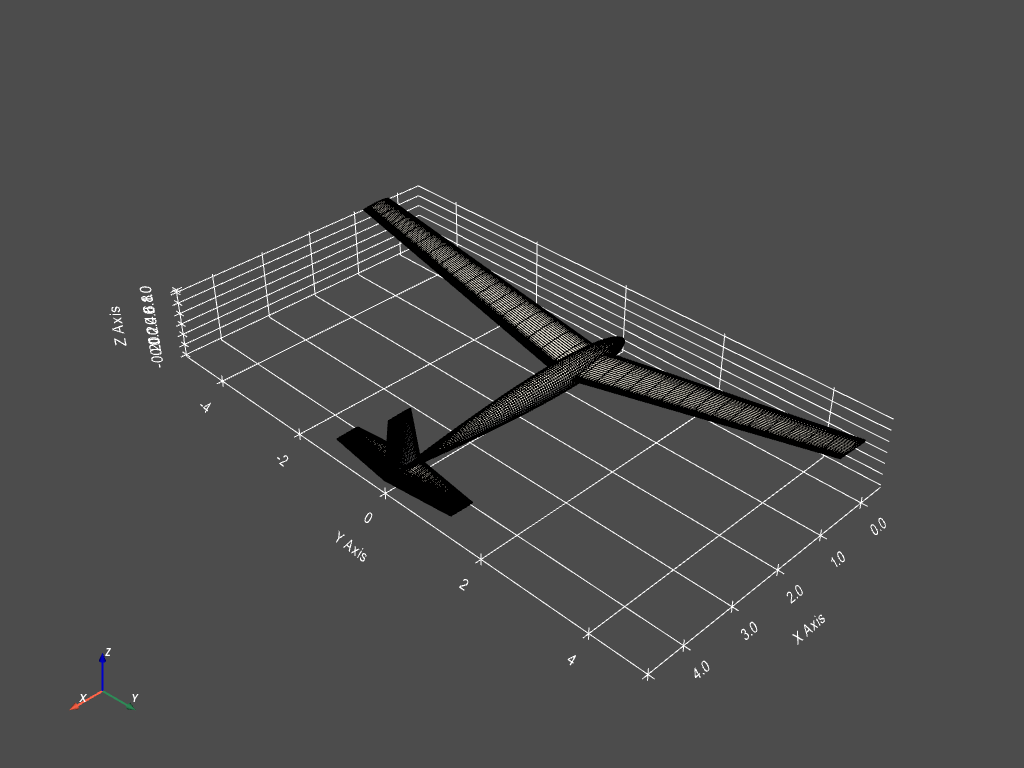

PolyData,Information
N Cells,11784
N Points,11825
X Bounds,"-5.000e-01, 4.700e+00"
Y Bounds,"-5.002e+00, 5.002e+00"
Z Bounds,"-2.399e-01, 1.048e+00"
N Arrays,0


In [9]:
# NBVAL_SKIP

airplane.draw(
    show_kwargs={"jupyter_backend": "static"}  # Ignore this; this is just so the tutorial shows a picture
)

## Axes and Units

Axes for geometry definition are given in "geometry axes". This coordinate system is visible in the plot above: $x$ is backwards, $y$ is starboard, and $z$ is up. Another way to think about it is that it is identical to body axes rotated by $180^\circ$ about the $y$-axis.

Units should be given in meters, always. Angles (e.g. twist angles) should be given in degrees.
